<a href="https://colab.research.google.com/github/Xikhongelo/sales-report-python-analysis/blob/main/Sales_Report_Python_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

In [ ]:
!pip install geopandas matplotlib

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/train_year.xlsx', engine='openpyxl')

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order year
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017
9796,9797,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016
9797,9798,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016
9798,9799,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016


In [ ]:
x = df['Order year ']

In [ ]:
y = df['Sales']

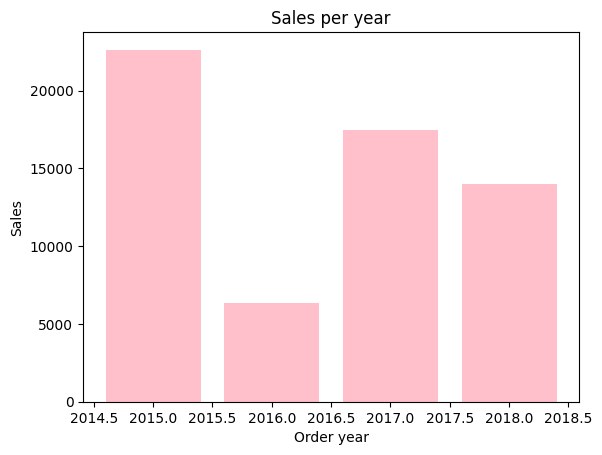

In [ ]:
df['Order year'] = pd.to_datetime(df['Order Date']).dt.year


plt.bar(x,y, color = 'pink')
plt.xlabel('Order year')
plt.ylabel('Sales')
plt.title('Sales per year')
plt.show()

In [ ]:
z = df['Region']

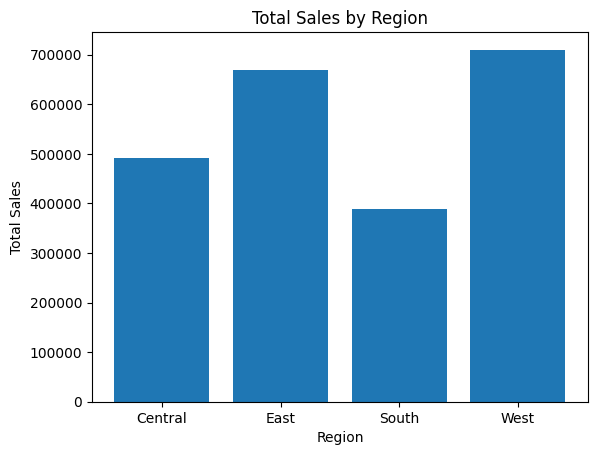

In [ ]:
sales_by_region = df.groupby('Region')['Sales'].sum()

plt.bar(sales_by_region.index, sales_by_region.values)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.show()

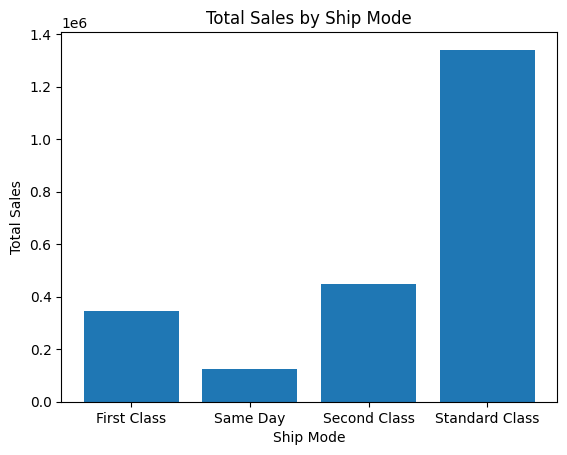

In [ ]:
sales_by_mode = df.groupby('Ship Mode')['Sales'].sum()

plt.bar(sales_by_region.index, sales_by_region.values)
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.title('Total Sales by Ship Mode')
plt.show()

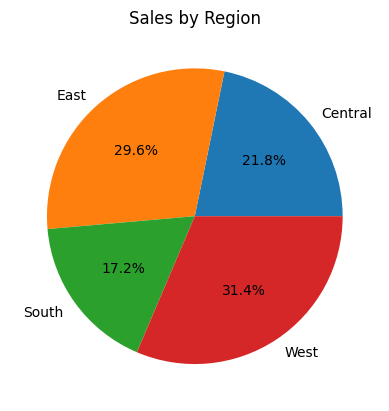

In [ ]:
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%')
plt.title('Sales by Region')
plt.show()

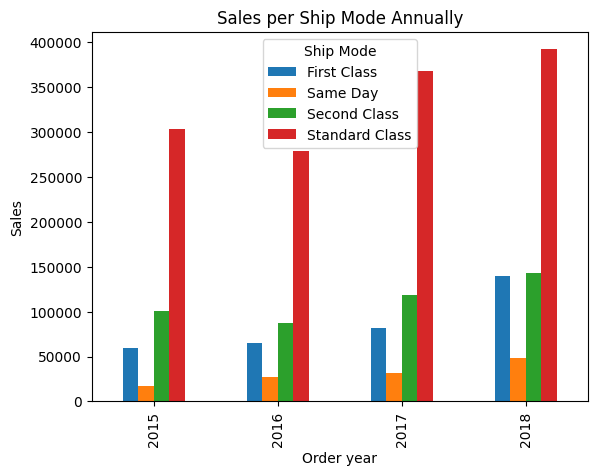

In [ ]:
df['Order year'] = pd.to_datetime(df['Order Date']).dt.year

sales_by_year_shipmode = df.groupby(['Order year', 'Ship Mode'])['Sales'].sum()

sales_by_year_shipmode.unstack(level=1).plot(kind='bar') #unstack using level 1 which is 'Ship Mode'
plt.xlabel('Order year')
plt.ylabel('Sales')
plt.title('Sales per Ship Mode Annually')
plt.legend(title='Ship Mode') # Added a legend to identify the Ship Modes
plt.show()

<ipython-input-39-ea84e5b5fd50>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


pop_est         0
continent       0
name            0
iso_a3          0
gdp_md_est      0
geometry        0
Sales         177
dtype: int64


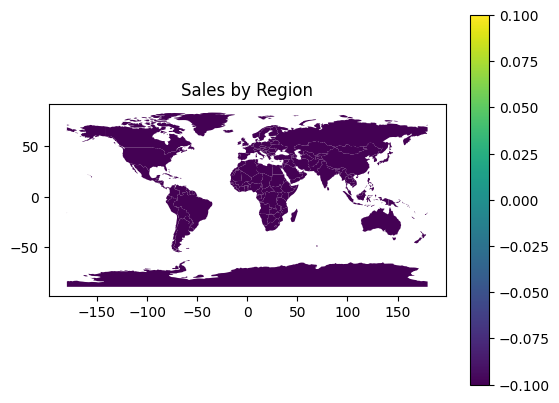

In [ ]:
sales_by_region = df.groupby('Region')['Sales'].sum()


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


merged_data = world.merge(sales_by_region, left_on='name', right_on='Region', how='left')


print(merged_data.isnull().sum())


merged_data['Sales'].fillna(0, inplace=True)


fig, ax = plt.subplots(1, 1)
merged_data.plot(column='Sales', cmap='viridis', legend=True, ax=ax)
plt.title('Sales by Region')
plt.show()

In [ ]:
sales_by_product = df.groupby('Product Name')['Sales'].sum()
sales_by_product = sales_by_product.sort_values(ascending=False)
sales_by_product = pd.DataFrame(sales_by_product)
sales_by_product

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
...,...
Acme Serrated Blade Letter Opener,7.632
Grip Seal Envelopes,7.072
Xerox 20,6.480


In [ ]:
sales_by_region_shipmode = df.groupby(['Region', 'Ship Mode'])['Sales'].sum()

sales_by_region_shipmode = sales_by_region_shipmode.unstack(level=1)

display(sales_by_region_shipmode)

Ship Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,58057.2978,20105.922,97605.7134,316877.9800
East,110436.6930,43316.464,115108.2580,400657.3110
South,49045.9160,21017.173,93434.5365,225653.8335
West,128032.3505,40779.480,143765.6715,397642.1825


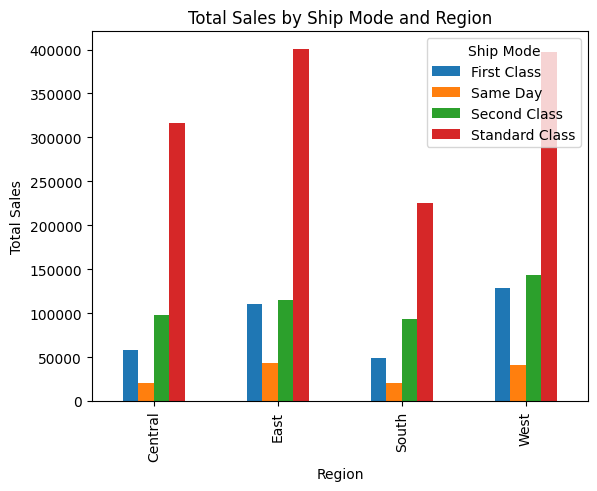

In [ ]:
sales = df.groupby(['Region', 'Ship Mode'])['Sales'].sum()
sales.unstack().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Ship Mode and Region')
plt.legend(title='Ship Mode')
plt.show()